# INFO 370 PS2
*Name: Brian Park*

List your collaborators here:
1. Jae Sang Woo

In [2506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cleaning data

In [2507]:
#1-1
dfGm = pd.read_csv("../data/gapminder.csv.bz2", sep = "\t")
dfGm.sample(5)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
9331,PLW,Palau,PW,Oceania,Micronesia,NaN,1965.0,11003.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,66.006,NaN,5.99891,NaN,NaN
2674,CRI,Costa Rica,CR,Americas,Latin America and the Caribbean,Central America,1985.0,2736712.0,3.464,74.429,...,NaN,26810.0,NaN,380804.0,282.80702,2266.206,7763.44890,0.82808,NaN,NaN
12739,VUT,Vanuatu,VU,Oceania,Melanesia,NaN,2005.0,209282.0,4.301,68.350,...,31.18603,1830.0,NaN,767.0,NaN,58.672,436.13738,0.28035,0.0,NaN
4884,GUY,Guyana,GY,Americas,Latin America and the Caribbean,South America,1968.0,686146.0,5.642,61.588,...,NaN,13660.0,3310.0,177356.0,24.50986,1331.121,NaN,1.94000,NaN,NaN
2353,COD,"Congo, Democratic Republic of the",CD,Africa,Sub-Saharan Africa,Middle Africa,1965.0,17369883.0,6.089,42.257,...,NaN,251500.0,850.0,448234.0,0.22013,2471.558,NaN,0.14229,NaN,NaN


In [2508]:
#1-2
dfGm.shape

(13055, 25)

The dataset has 13,055 rows and 25 columns.

In [2509]:
#1-2 contd.
dfGm.head(5)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,...,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,...,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,...,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,...,NaN,20.0,NaN,NaN,NaN,12178.107,NaN,214.80037,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,...,NaN,20.0,NaN,NaN,NaN,11840.743,NaN,207.61578,NaN,NaN


The first few lines of data seem quite reasonable, but we can make it look more resonable as cleaning up those null values.

In [2510]:
#1-3
dfGm.isna().sum() #number of missing values in each variable

iso3                       0
name                     240
iso2                     300
region                   241
sub-region               241
intermediate-region     7697
time                      36
totalPopulation           76
fertilityRate           1307
lifeExpectancy          1325
childMortality          2600
youthFemaleLiteracy    12134
youthMaleLiteracy      12134
adultLiteracy          12118
GDP_PC                  3585
accessElectricity       7608
agriculturalLand        1910
agricultureTractors     6947
cerealProduction        3606
fertilizerHa            4929
co2                     2658
greenhouseGases         4994
co2_PC                  2661
pm2.5_35               10727
battleDeaths           12051
dtype: int64

Those variables such as "youth Female Literacy", "youthMale Literacy", "adultLiteracy", etc. almost having the same number of null values as the total number of rows are nearly unusable because of their inefficient usability. On the other hand, variables having less number of null values such as "iso3", "iso2", "time", etc. are usable enough to produce meaningful analysis.

In [2511]:
#1-4
dfGm[dfGm['time'].isna()][["name", "iso2", "totalPopulation"]].sample(10)

,name,iso2,totalPopulation
2769,Curaçao,CW,NaN
8180,Montserrat,MS,NaN
181,Åland Islands,AX,NaN
10348,Svalbard and Jan Mayen,SJ,NaN
5358,British Indian Ocean Territory,IO,NaN
12212,United States Minor Outlying Islands,UM,NaN
3491,Western Sahara,EH,NaN
1806,Bouvet Island,BV,NaN
1987,Cocos (Keeling) Islands,CC,NaN
180,Anguilla,AI,NaN


In [2512]:
#1-5

I'm seeing that rows having null values in the "time" variable are also missing values in the "totalPopulation" variable. I assume that the reason these observations are missing is that the person who collected the data was not able to gather information about both the total population and the year.

In [2513]:
#1-6 // name is missing but iso-2 code is there?
dfIso = dfGm.loc[dfGm['name'].isna()]
dfIso.loc[dfIso['iso2'].notnull()]

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths


There are 0 cases where name is missing but iso-2 code is there.

In [2514]:
#1-6 contd. // iso-2 code is missing but name is there?
dfNm = dfGm.loc[dfGm['iso2'].isna()]
dfNm.loc[dfNm['name'].notnull()]

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
8363,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1960.0,634142.0,6.149,46.483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8364,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1961.0,649279.0,6.167,47.231,...,NaN,386420.0,NaN,35592.0,NaN,NaN,NaN,NaN,NaN,NaN
8365,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1962.0,665115.0,6.184,47.957,...,NaN,386420.0,NaN,37068.0,NaN,NaN,NaN,NaN,NaN,NaN
8366,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1963.0,681637.0,6.199,48.656,...,NaN,386420.0,NaN,37208.0,NaN,NaN,NaN,NaN,NaN,NaN
8367,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1964.0,698796.0,6.216,49.325,...,NaN,386460.0,NaN,39600.0,NaN,NaN,NaN,NaN,NaN,NaN
8368,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1965.0,716584.0,6.236,49.958,...,NaN,386460.0,NaN,43900.0,NaN,NaN,NaN,NaN,NaN,NaN
8369,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1966.0,734867.0,6.265,50.554,...,NaN,386460.0,NaN,46000.0,NaN,NaN,NaN,NaN,NaN,NaN
8370,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1967.0,753688.0,6.305,51.116,...,NaN,386490.0,NaN,48200.0,NaN,NaN,NaN,NaN,NaN,NaN
8371,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1968.0,773422.0,6.354,51.650,...,NaN,386490.0,NaN,51400.0,NaN,NaN,NaN,NaN,NaN,NaN
8372,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1969.0,794588.0,6.411,52.163,...,NaN,386490.0,NaN,52700.0,NaN,NaN,NaN,NaN,NaN,NaN


There are 60 cases where iso-2 code is missing but name (Namibia) is there.

In [2515]:
#1-7

The two-letter country code for Namibia is NA, which commonly represents a missing value in the dataset. For this reason, Namibia has its iso-2 code missing to avoid any confusion observing the data.

In [2516]:
#1-8
dfGm.name.nunique() #total number of different countries in the dataset.

249

In [2517]:
#1-9
dfGm.time.min(), dfGm.time.max() #(earliest year, most recent year)

(1960.0, 2019.0)

## 2. Wealth

In [2518]:
#2-1
dfClean = dfGm.dropna(axis = 0, subset = ["GDP_PC"])
dfClean.time.max()

2019.0

The most recent GDP data was from 2019.

In [2519]:
#2-2
df2019 = dfGm[(dfGm.time == 2019)]
avgGDP = df2019.GDP_PC.mean()
print(avgGDP)

15055.352217243239


The average wealth in 2019 was 15055.35.

In [2520]:
#2-3
dfTime = dfClean[(dfClean.time >= 2010)].groupby("name").time.max()
dfTime.nsmallest(5)

name
Djibouti                    2010.0
Faroe Islands               2010.0
Liechtenstein               2010.0
Turks and Caicos Islands    2010.0
Eritrea                     2011.0
Name: time, dtype: float64

Djibouti, Faroe Islands, Liechtenstein, Turks and Caicos Islands, and Eritrea are 5 countries having the largest number of the most recent years (2010 and later) missing. The first four countries have the most recent GDP data in 2010 while Eritrea has its most recent GDP data in 2011. I assume that those countries have undergone a sovereign default that made their GDP not be able to be evaluated.

In [2521]:
#2-4
df2019.groupby('region')['GDP_PC'].mean().sort_values(ascending = False)

region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64

The order above seems quite reasonable, but I expected that Asia would have had higher average GDP since they have the largest number of populations.

In [2522]:
#2-5c
i = df2019.GDP_PC.idxmax()
i

7039

In [2523]:
#2-5d
df2019.loc[i][["region", "name", "GDP_PC", "totalPopulation"]]

region                  Europe
name                Luxembourg
GDP_PC             111043.5317
totalPopulation       620001.0
Name: 7039, dtype: object

In [2524]:
#2-5e
imx = df2019.groupby("region").GDP_PC.idxmax()
dfImx = df2019.loc[imx][["region", "name", "GDP_PC", "totalPopulation"]]
dfImx

,region,name,GDP_PC,totalPopulation
11249,Africa,Seychelles,15048.74693,97625.0
1505,Americas,Bermuda,94106.36125,64027.0
9924,Asia,Qatar,63281.67468,2832067.0
7039,Europe,Luxembourg,111043.53170,620001.0
663,Oceania,Australia,57183.37935,25365745.0


In [2525]:
#2-5e
imn = df2019.groupby("region").GDP_PC.idxmin()
dfImn = df2019.loc[imn][["region", "name", "GDP_PC", "totalPopulation"]]
dfImn

,region,name,GDP_PC,totalPopulation
843,Africa,Burundi,208.07473,11530580.0
5176,Americas,Haiti,1245.01250,11263077.0
119,Asia,Afghanistan,573.28755,38041754.0
12211,Europe,Ukraine,3224.93517,44386203.0
10408,Oceania,Solomon Islands,1749.42726,669823.0


In [2526]:
#2-6
dfGDP = pd.concat((dfImn.reset_index(), dfImx.drop(dfImx.columns[[0]], axis=1).reset_index()), axis = 1).drop(['index'], axis = 1)
dfGDP.set_index('region').set_axis(['poorest', 'GDP', 'population', 'richest', 'GDP', 'population'], axis = 1)

,poorest,GDP,population,richest,GDP,population
region,,,,,,
Africa,Burundi,208.07473,11530580.0,Seychelles,15048.74693,97625.0
Americas,Haiti,1245.01250,11263077.0,Bermuda,94106.36125,64027.0
Asia,Afghanistan,573.28755,38041754.0,Qatar,63281.67468,2832067.0
Europe,Ukraine,3224.93517,44386203.0,Luxembourg,111043.53170,620001.0
Oceania,Solomon Islands,1749.42726,669823.0,Australia,57183.37935,25365745.0


In [2527]:
#2-7

I didn't expect that Bermuda would be the richest country in the Americas. I'm not quite sure why it is the case, but Google says that they make a lot of money from running international businesses such as insurance and financial services which can bring a lot of revenues to their GDP. I assume the reason why most of the rich countries have small populations is that their productivity growth is relatively higher than population growth, which can help them save money and promote the GDP.

## 3. Health

In [2528]:
#3-1-1
df1960 = dfGm[(dfGm.time == 1960)]
df1960.childMortality.isna().sum()

104

There are 104 countries that do not have CM data in 1960.

In [2529]:
#3-1-2
df2019.childMortality.isna().sum()

24

There are 24 countries that do not have CM data in 2019.

Yes, data has improved over time since we have less numbers of missing values for CM data.

In [2530]:
#3-2 largest CM
dfGm.nlargest(1, "childMortality")[['time', 'name', 'childMortality']]

,time,name,childMortality
7703,1963.0,Mali,420.6


In [2531]:
#3-2 largest CM
imx = dfGm.childMortality.idxmax()
dfImx = dfGm.loc[imx][['time', 'name', 'childMortality']]
dfImx

time              1963.0
name                Mali
childMortality     420.6
Name: 7703, dtype: object

In [2532]:
#3-2 smallest CM
dfGm.nsmallest(1, "childMortality")[['time', 'name', 'childMortality']]

,time,name,childMortality
10587,2018.0,San Marino,1.7


In [2533]:
#3-2 smallest CM
imn = dfGm.childMortality.idxmin()
dfImn = dfGm.loc[imn][['time', 'name', 'childMortality']]
dfImn

time                  2018.0
name              San Marino
childMortality           1.7
Name: 10587, dtype: object

In [2534]:
#3-3 country with largest CM
imx = df2019.groupby("region").childMortality.idxmax()
dfImx = df2019.loc[imx][["region", "name", "childMortality"]]
dfImx

,region,name,childMortality
8603,Africa,Nigeria,117.2
5176,Americas,Haiti,62.8
9144,Asia,Pakistan,67.2
7399,Europe,"Moldova, Republic of",14.4
6199,Oceania,Kiribati,50.9


In [2535]:
#3-3 country with smallest CM
imn = df2019.groupby("region").childMortality.idxmin()
dfImn = df2019.loc[imn][["region", "name", "childMortality"]]
dfImn

,region,name,childMortality
6679,Africa,Libya,11.5
1986,Americas,Canada,4.9
2890,Asia,Cyprus,2.3
10588,Europe,San Marino,1.7
663,Oceania,Australia,3.6


In [2536]:
#3-4
dfGm2 = dfGm.dropna(axis = 0, subset = ["childMortality"])
imn = dfGm2.groupby("name").time.idxmin()
dfGm2.loc[imn][['time', "name", "childMortality"]]

,time,name,childMortality
62,1962.0,Afghanistan,344.6
200,1978.0,Albania,96.2
3251,1960.0,Algeria,240.5
267,1985.0,Andorra,17.1
140,1980.0,Angola,237.3
...,...,...,...
12454,1960.0,Venezuela (Bolivarian Republic of),79.2
12638,1964.0,Viet Nam,86.3
12817,1962.0,Yemen,409.8
12935,1960.0,Zambia,204.8


In [2537]:
#3-5
imx = dfGm2.groupby("name").time.idxmax()
dfGm2.loc[imx][['time', "name", "childMortality"]]

,time,name,childMortality
119,2019.0,Afghanistan,60.3
241,2019.0,Albania,9.7
3310,2019.0,Algeria,23.3
301,2019.0,Andorra,3.0
179,2019.0,Angola,74.7
...,...,...,...
12513,2019.0,Venezuela (Bolivarian Republic of),24.2
12693,2019.0,Viet Nam,19.9
12874,2019.0,Yemen,58.4
12994,2019.0,Zambia,61.7


In [2538]:
#3-6
df1 = pd.DataFrame({"country":"Nicaragua", "cm1":10}, index=[1])
df2 = pd.DataFrame({"country":"Nicaragua", "cm2":20}, index=[2])
df2.set_index("country", inplace = True) #True - we create a new dataframe
df1.set_index("country", inplace = True)
df2.cm2 - df1.cm1

country
Nicaragua    10
dtype: int64

I turned the "country" variables into index and set inplaced = True to create a new dataframe. Then, subtract cm1 from cm2 to compute the difference.

In [2539]:
#3-7
imn = dfGm2.groupby("name").time.idxmin()
df1 = dfGm2.loc[imn][['time', "name", "childMortality"]].rename(columns={'childMortality': 'CM0'})
imx = dfGm2.groupby("name").time.idxmax()
df2 = dfGm2.loc[imx][['time', "name", "childMortality"]].rename(columns={'childMortality': 'CM1'})

In [2540]:
df2.set_index("name", inplace = True)
df1.set_index("name", inplace = True)
df3 = 100*(((df2.CM1 / df1.CM0) ** (1/(df2.time - df1.time))) - 1).sort_values(ascending = True)
dfCom = pd.concat([df1, df2, df3], axis=1).rename(columns={0: 'Growth Rates'}).sort_values(by = "Growth Rates", ascending = True)
dfCom.head(10)[["CM0", "CM1", "Growth Rates"]]

,CM0,CM1,Growth Rates
name,,,
San Marino,20.7,1.7,-7.087767
Montenegro,27.3,2.3,-6.824472
Maldives,304.5,7.6,-6.605994
Saudi Arabia,160.5,6.6,-6.564459
"Korea, Republic of",112.2,3.2,-5.850889
Oman,339.5,11.4,-5.780349
Serbia,41.3,5.3,-5.697416
North Macedonia,56.6,6.1,-5.693891
Mongolia,172.0,15.6,-5.686141


In [2541]:
dfCom.tail(10)[["CM0", "CM1", "Growth Rates"]]

,CM0,CM1,Growth Rates
name,,,
Fiji,77.2,25.7,-1.846982
Nigeria,323.3,117.2,-1.827993
Zimbabwe,151.1,54.6,-1.710470
Micronesia (Federated States of),56.5,29.4,-1.704377
Chad,251.6,113.8,-1.673913
Bahamas,29.5,12.6,-1.654192
Central African Republic,283.1,110.1,-1.587954
Namibia,94.7,42.4,-1.533440
Somalia,196.3,117.0,-1.388833


In [2542]:
#3-8

Lesotho has the smallest negative growth rate while San Marino has the largest negative growth rate. I see a pattern that countries in Africa tend to have smaller negative growth rate while countries in Europe tend to have larger negative growth rate.

## 4. Graphical Analysis 

Text(0, 0.5, 'Child Mortality')

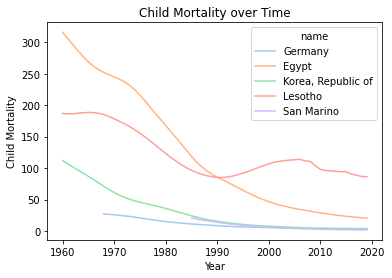

In [2543]:
#4-1
import seaborn as sns
dfSlt = dfGm[dfGm.name.isin(['San Marino', 'Lesotho', 'Egypt', 'Korea, Republic of', 'Germany'])]
_ = sns.lineplot(data = dfSlt, x = "time", y = "childMortality", hue = "name")
plt.title('Child Mortality over Time')
plt.xlabel("Year")
plt.ylabel("Child Mortality")

Surprisingly, Egypt has undergone a significant decrease in child mortality compared to the rest. Lesotho's child mortality has slightly increased since around 1990. Germany and San Marino have their child mortality data missing until around 1967 and 1985. Overall, all of their child mortality has significantly decreased since 1960.